# Part 1 :- SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [3]:
X = dataset.iloc[:,:-1].values

In [4]:
y = dataset.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

In [6]:
X =sc.fit_transform(X)

In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(x =10, y= 10, input_len=15,sigma=1.0, learning_rate=0.5)

In [9]:
som.random_weights_init(X)

In [10]:
som.train_random(data= X,num_iteration=100)

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

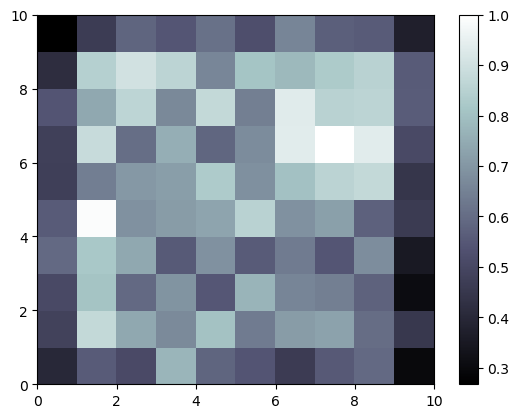

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [13]:
markers = ['o', 's']
colors = ['r', 'g']

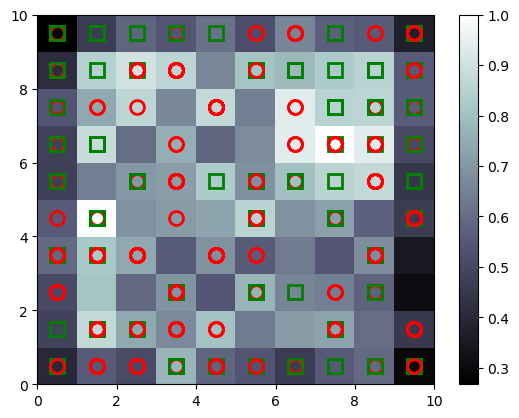

In [14]:
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

In [15]:
#finding the fraude
mappings = som.win_map(X)

In [17]:
fraudes = np.concatenate( (mappings[(2,5)], mappings[(8,6)]), axis = 0)

In [18]:
fraudes = sc.inverse_transform(fraudes)

# Part 2 :-  Unsupervised to Supervised Model

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [21]:
coustomers = dataset.iloc[:,1:].values

In [22]:
#dependent variable
is_fraud =np.zeros(len(dataset))

In [23]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in fraudes:
        is_fraud[i] = 1

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
coustomers = sc.fit_transform(coustomers)

In [25]:
ann = tf.keras.models.Sequential()

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [29]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
a = ann.fit(coustomers, is_fraud, batch_size = 32, epochs=100)

Epoch 1/100
22/22 [==============================] - 2s 5ms/step - loss: 1.2621 - accuracy: 0.1696
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0603 - accuracy: 0.2551
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9126 - accuracy: 0.3536
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8010 - accuracy: 0.4478
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7125 - accuracy: 0.5362
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.6565
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.7652
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.8493
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.8928
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4183 - accuracy: 0.9275
Epoch 11/

22/22 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9913
Epoch 84/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9913
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9913
Epoch 86/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9913
Epoch 87/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9913
Epoch 88/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.9913
Epoch 89/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9913
Epoch 90/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9913
Epoch 91/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9913
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9913
Epoch 93/100


In [32]:
y_pred = ann.predict(coustomers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 4ms/step


In [33]:
print(y_pred)

[[1.57901130e+07 3.62020707e-08]
 [1.56907720e+07 1.27832223e-07]
 [1.56136730e+07 1.35042072e-07]
 ...
 [1.57199400e+07 7.62338817e-01]
 [1.56675880e+07 8.13117206e-01]
 [1.57363990e+07 8.38333130e-01]]
